In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Electronic - Electronic.csv.csv')

In [ ]:
data.shape

(5000, 15)

In [ ]:
data.head()

Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56                1    29.226195     47.077380            1.000000   
1   69               10   420.142612      7.985739            3.760294   
2   46                4   127.742817     37.225718            1.771240   
3   32                9   417.722683      8.227732            1.926831   
4   60               13   608.031366      5.000000            3.902927   

   Warranty Extension  Gender Region Product Category Payment Method  \
0                   1    Male  South      Accessories            UPI   
1                   1  Female  South      Accessories           Cash   
2                   1    Male   East           Laptop    Credit Card   
3                   0  Female   East           Tablet            UPI   
4                   0  Female  South           Tablet            UPI   

       Revenue  Store Rating  Loyalty Score  Membership Status  \
0   149.252145      3.660461       3.597133                1.0   
1  1485.524222      3.551553      25.764903                1.0   
2    85.550131      3.922839       7.022399                1.0   
3   824.118724      3.860422       7.635412                1.0   
4  2463.590392      3.812820      29.461119                0.0   

  Preferred Visit Time  
0              Evening  
1              Evening  
2              Morning  
3            Afternoon  
4              Morning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [ ]:
data.describe()

Age  Items Purchased  Total Spent  Discount (%)  \
count  5000.000000      5000.000000  5000.000000   5000.000000   
mean     43.584600         7.536600   243.721837     26.622330   
std      14.919094         4.014858   154.949018     13.586725   
min      18.000000         1.000000    15.105730      5.000000   
25%      31.000000         4.000000   119.130074     15.382663   
50%      43.000000         7.000000   221.514206     27.848579   
75%      56.000000        11.000000   346.173367     38.086993   
max      69.000000        14.000000   699.611576     48.489427   

       Satisfaction Score  Warranty Extension      Revenue  Store Rating  \
count         5000.000000         5000.000000  5000.000000   4997.000000   
mean             2.650108            0.220400   717.998214      3.975184   
std              1.533394            0.414558   776.789137      0.250691   
min              1.000000            0.000000  -201.427094      3.076092   
25%              1.000000            0.000000   164.697614      3.799761   
50%              2.338884            0.000000   380.548500      3.969738   
75%              4.129317            0.000000  1047.426498      4.149998   
max              5.000000            1.000000  3523.469177      4.764298   

       Loyalty Score  Membership Status  
count    5000.000000        4994.000000  
mean       15.638275           0.308370  
std         9.144742           0.461867  
min         0.000000           0.000000  
25%         7.944790           0.000000  
50%        13.969791           0.000000  
75%        23.521601           1.000000  
max        39.235391           1.000000

In [ ]:
df=data.copy()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age                     0
Items Purchased         0
Total Spent             0
Discount (%)            0
Satisfaction Score      0
Warranty Extension      0
Gender                  2
Region                  0
Product Category        0
Payment Method          4
Revenue                 0
Store Rating            3
Loyalty Score           0
Membership Status       6
Preferred Visit Time    8
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

Age                     0.00
Items Purchased         0.00
Total Spent             0.00
Discount (%)            0.00
Satisfaction Score      0.00
Warranty Extension      0.00
Gender                  0.04
Region                  0.00
Product Category        0.00
Payment Method          0.08
Revenue                 0.00
Store Rating            0.06
Loyalty Score           0.00
Membership Status       0.12
Preferred Visit Time    0.16
dtype: float64

Since all of them are of fewer proportions, let's drop the corresponding rows.

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum().sum()

0

Missing values have been handled by eliminating rows containg them.

In [ ]:
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]

if single_value_columns:
    print("Columns with only one unique value:", single_value_columns)
else:
    print("No columns with only one unique value found.")

No columns with only one unique value found.


In [ ]:
proportion_unique = {col: df[col].nunique() / df.shape[0] for col in df.columns}
proportion_unique

{'Age': 0.010445962233828847,
 'Items Purchased': 0.002812374447569305,
 'Total Spent': 1.0,
 'Discount (%)': 0.883688228204098,
 'Satisfaction Score': 0.5570510245078345,
 'Warranty Extension': 0.0004017677782241864,
 'Gender': 0.0006026516673362796,
 'Region': 0.0008035355564483728,
 'Product Category': 0.001004419445560466,
 'Payment Method': 0.001004419445560466,
 'Revenue': 1.0,
 'Store Rating': 1.0,
 'Loyalty Score': 0.9923664122137404,
 'Membership Status': 0.0004017677782241864,
 'Preferred Visit Time': 0.0006026516673362796}

In [ ]:
cat_df = df.select_dtypes(include='object')
cat_df.columns

Index(['Gender', 'Region', 'Product Category', 'Payment Method',
       'Preferred Visit Time'],
      dtype='object')

In [ ]:
cat_df.nunique()

Gender                  3
Region                  4
Product Category        5
Payment Method          5
Preferred Visit Time    3
dtype: int64

In [ ]:
for col in cat_df.columns:
  print(f'\n{cat_df[col].value_counts()}')


Gender
Male      2440
Female    2357
Other      181
Name: count, dtype: int64

Region
South    1308
West     1273
East     1202
North    1195
Name: count, dtype: int64

Product Category
Accessories    1011
Laptop         1006
Tablet          995
Television      985
Mobile          981
Name: count, dtype: int64

Payment Method
Net Banking    1032
Cash           1013
Credit Card    1006
Debit Card      975
UPI             952
Name: count, dtype: int64

Preferred Visit Time
Morning      1671
Afternoon    1654
Evening      1653
Name: count, dtype: int64


In [ ]:
for col in cat_df.columns:
  print(f'\n{cat_df[col].value_counts(normalize=True)}')


Gender
Male      0.490157
Female    0.473483
Other     0.036360
Name: proportion, dtype: float64

Region
South    0.262756
West     0.255725
East     0.241462
North    0.240056
Name: proportion, dtype: float64

Product Category
Accessories    0.203094
Laptop         0.202089
Tablet         0.199879
Television     0.197871
Mobile         0.197067
Name: proportion, dtype: float64

Payment Method
Net Banking    0.207312
Cash           0.203495
Credit Card    0.202089
Debit Card     0.195862
UPI            0.191241
Name: proportion, dtype: float64

Preferred Visit Time
Morning      0.335677
Afternoon    0.332262
Evening      0.332061
Name: proportion, dtype: float64


No standardisation is needed for the entries in categorical columns.

In [ ]:
num_df = df.select_dtypes(include='number')
num_df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status'],
      dtype='object')

In [ ]:
for col in num_df.columns:
  print(f'\n{num_df[col].value_counts()}')


Age
66    118
64    117
52    114
43    110
54    109
25    109
38    109
62    108
45    108
51    106
42    104
39    104
34    104
46    103
68    103
50    102
58    102
21    102
49    101
53    100
40    100
61     99
41     99
28     98
37     97
29     97
19     96
23     96
22     95
47     95
20     95
57     94
18     93
36     93
56     93
30     91
31     91
35     90
32     90
26     89
55     88
27     87
69     87
67     84
63     81
44     80
65     78
33     78
59     77
24     74
60     71
48     69
Name: count, dtype: int64

Items Purchased
10    404
13    393
7     385
6     382
2     363
11    347
1     345
12    345
3     344
4     342
9     334
5     333
14    331
8     330
Name: count, dtype: int64

Total Spent
29.226195     1
72.837942     1
243.672980    1
286.013801    1
198.635967    1
             ..
182.042708    1
106.576625    1
430.511877    1
95.015680     1
366.613874    1
Name: count, Length: 4978, dtype: int64

Discount (%)
5.000000     580
47.077

In [ ]:
satisfaction_counts = df['Satisfaction Score'].value_counts()
satisfaction_counts

Satisfaction Score
1.000000    1431
5.000000     776
1.845655       1
4.622227       1
1.128339       1
            ... 
1.185899       1
2.338541       1
2.008539       1
3.823895       1
2.718373       1
Name: count, Length: 2773, dtype: int64

In [ ]:
df['Satisfaction Score'].value_counts(normalize = True)

Satisfaction Score
1.000000    0.287465
5.000000    0.155886
1.845655    0.000201
4.622227    0.000201
1.128339    0.000201
              ...   
1.185899    0.000201
2.338541    0.000201
2.008539    0.000201
3.823895    0.000201
2.718373    0.000201
Name: proportion, Length: 2773, dtype: float64



> **Pie plots analysing the distribution of Satisfaction score, Loyalty score and Preffered visit time.**






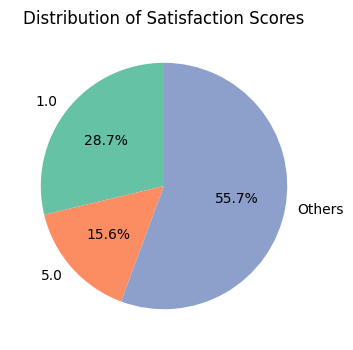

In [ ]:
# Pie plot for Satisfaction score

threshold = 200
satisfaction_counts_filtered = satisfaction_counts[satisfaction_counts >= threshold]
others_count = satisfaction_counts[satisfaction_counts < threshold].sum()
satisfaction_counts_filtered['Others'] = others_count

plt.figure(figsize=(4,4))
plt.pie(satisfaction_counts_filtered, labels=satisfaction_counts_filtered.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(satisfaction_counts_filtered)))
plt.title('Distribution of Satisfaction Scores')
plt.show()

Distinctive of all Satisfaction scores are 1 and 5 while, values in between constitute more than half of the total counts.

In [ ]:
loyalty_counts = df['Loyalty Score'].value_counts()
loyalty_counts

Loyalty Score
0.000000     39
3.597133      1
8.803139      1
11.538862     1
18.730772     1
             ..
27.617061     1
13.320441     1
11.092465     1
29.241904     1
19.076740     1
Name: count, Length: 4940, dtype: int64

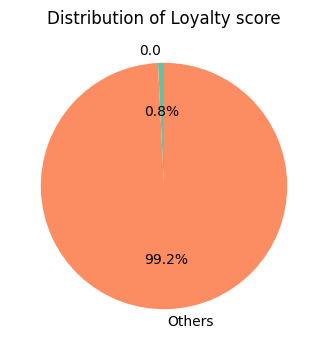

In [ ]:
# Pie plot for Loyalty score

threshold = 10
loyalty_counts_filtered = loyalty_counts[loyalty_counts >= threshold]
others_count = loyalty_counts[loyalty_counts < threshold].sum()
loyalty_counts_filtered['Others'] = others_count

plt.figure(figsize=(4,4))
plt.pie(loyalty_counts_filtered, labels=loyalty_counts_filtered.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(loyalty_counts_filtered)))
plt.title('Distribution of Loyalty score')
plt.show()

0.8% of the total loyalty scores are 0. Rest of them are of unique distinctive scores, which are greater than 0.

In [ ]:
visit_counts = df['Preferred Visit Time'].value_counts()
visit_counts

Preferred Visit Time
Morning      1671
Afternoon    1654
Evening      1653
Name: count, dtype: int64

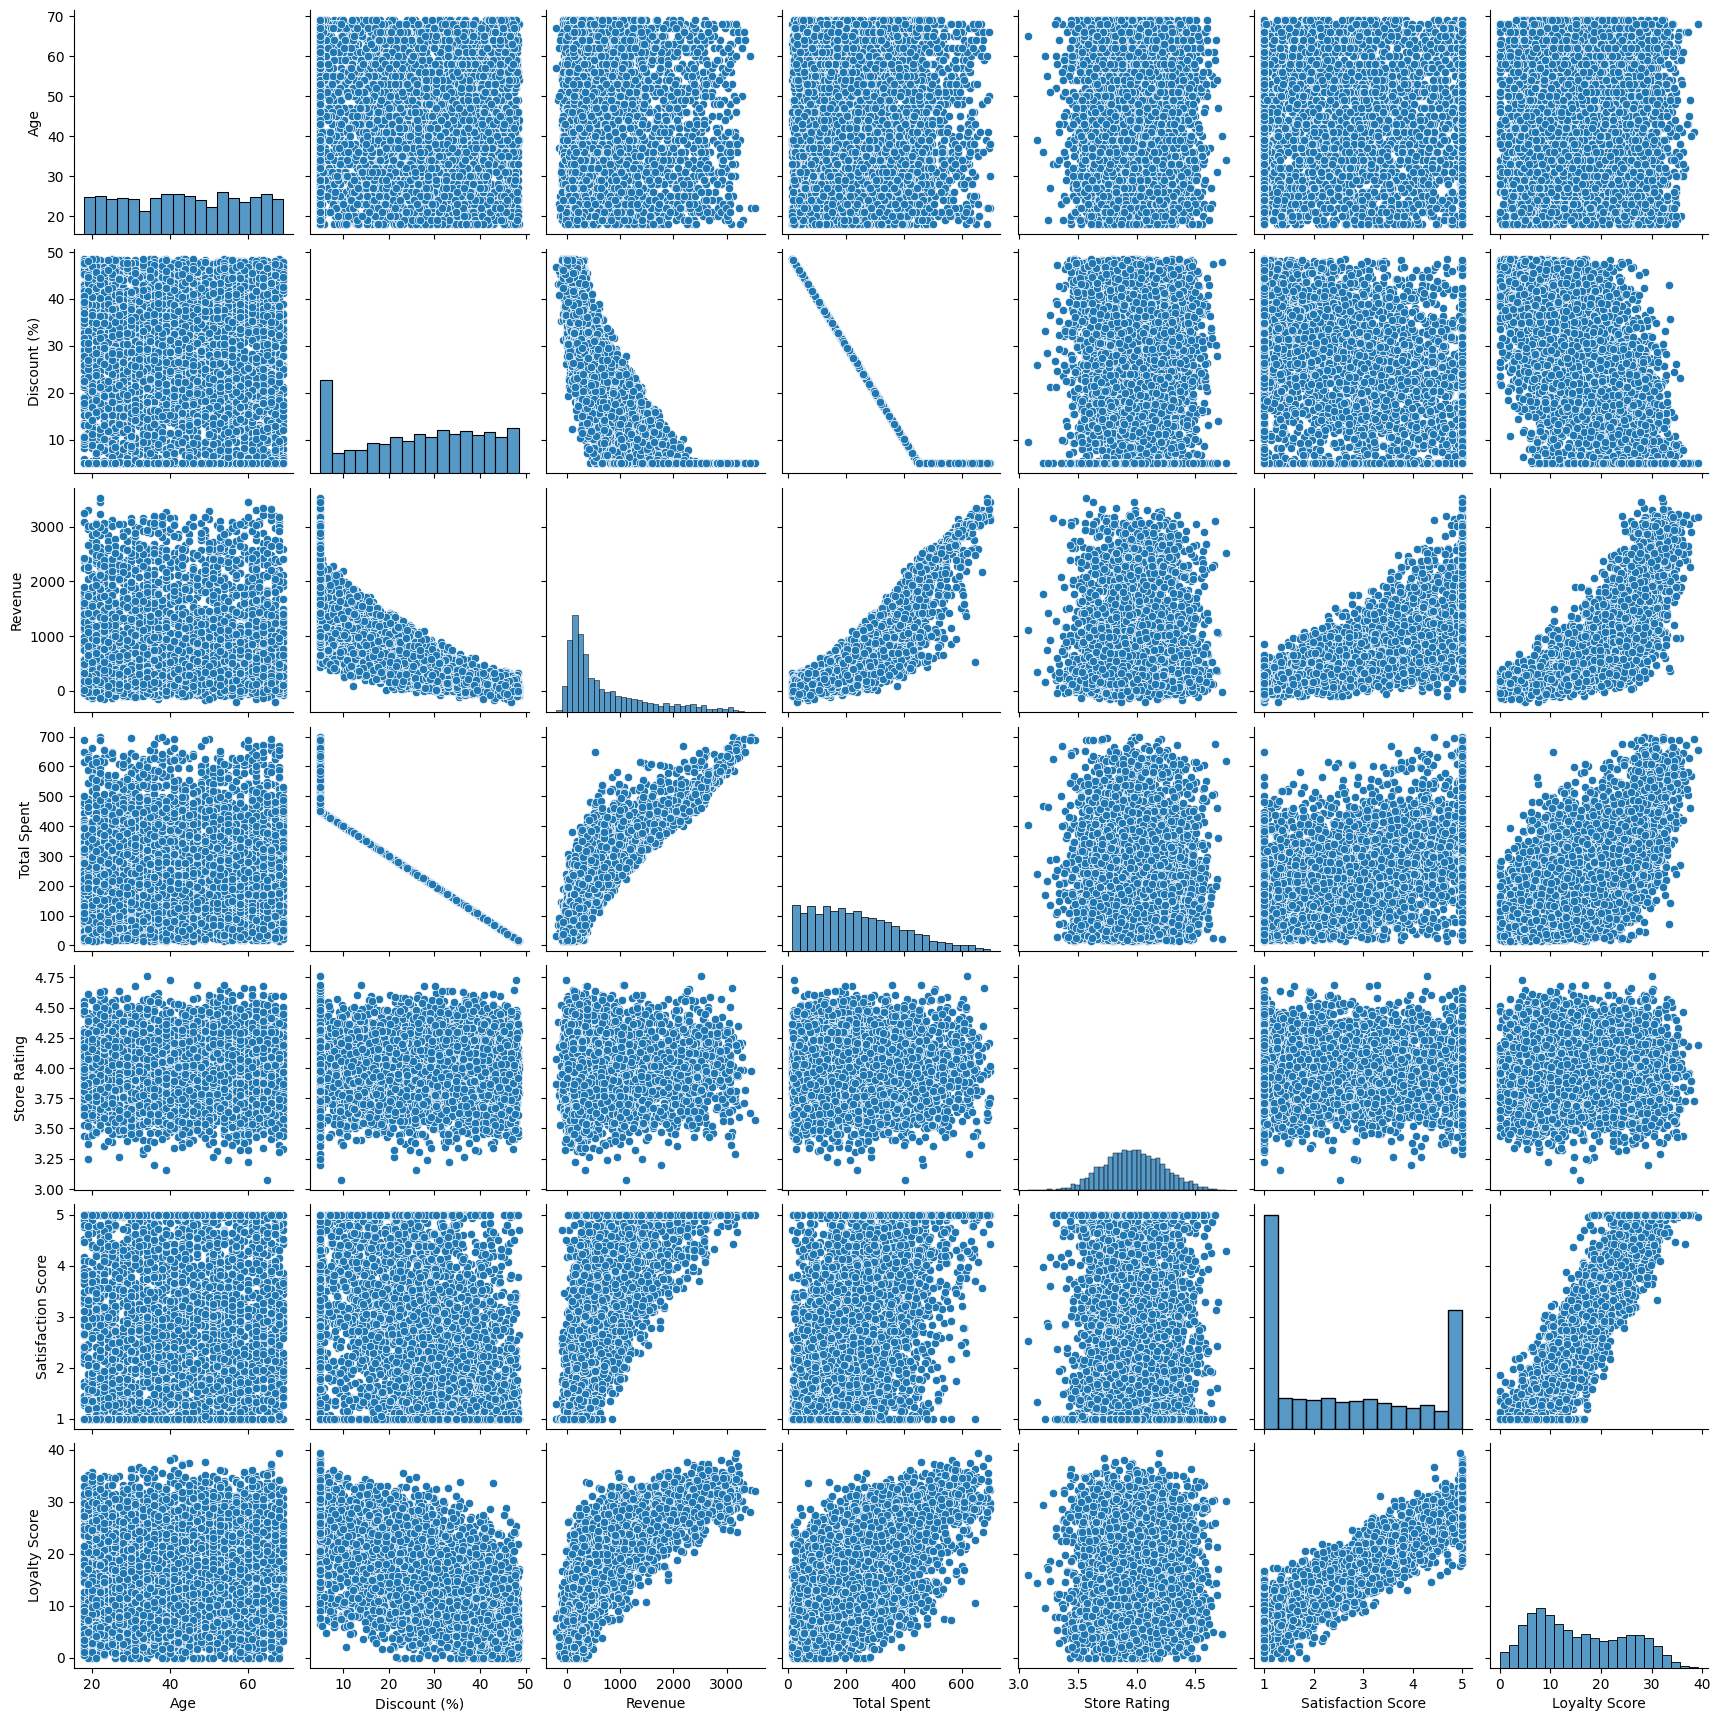

In [ ]:
sns.pairplot(df[['Age', 'Discount (%)', 'Revenue', 'Total Spent','Store Rating', 'Satisfaction Score', 'Loyalty Score']])
plt.show()

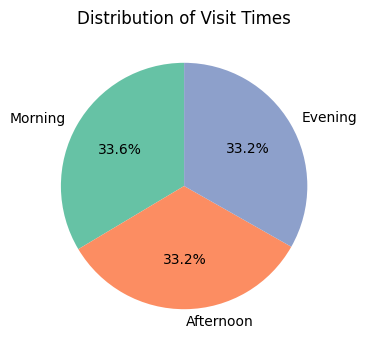

In [ ]:
# Pie plot for Visit Times

plt.figure(figsize=(4,4))
plt.pie(visit_counts, labels=visit_counts.index, autopct='%1.1f%%', startangle=90 ,colors=sns.color_palette("Set2"))
plt.title('Distribution of Visit Times')
plt.show()

Almost evenly distributed

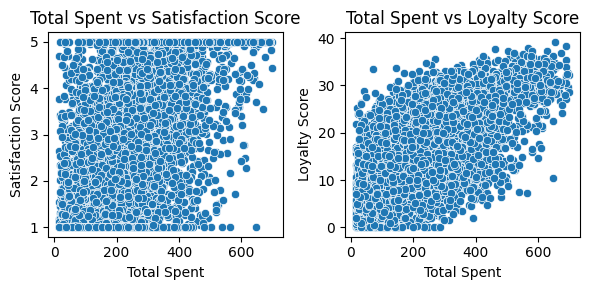

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter Plot: "Total Spent" vs "Satisfaction Score"
sns.scatterplot(x='Total Spent', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Total Spent vs Satisfaction Score')
axes[0].set_xlabel('Total Spent')
axes[0].set_ylabel('Satisfaction Score')

# Scatter Plot: "Total Spent" vs "Loyalty Score"
sns.scatterplot(x='Total Spent', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title('Total Spent vs Loyalty Score')
axes[1].set_xlabel('Total Spent')
axes[1].set_ylabel('Loyalty Score')

plt.tight_layout()
plt.show()

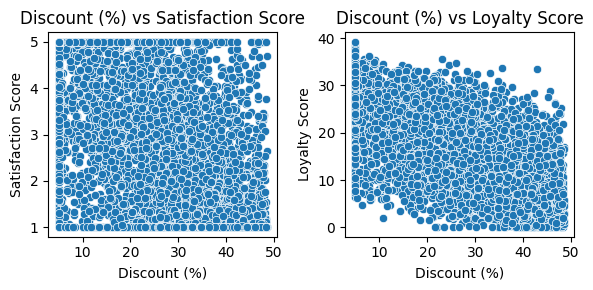

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter Plot: "Discount (%)" vs "Satisfaction Score"
sns.scatterplot(x='Discount (%)', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Discount (%) vs Satisfaction Score')
axes[0].set_xlabel('Discount (%)')
axes[0].set_ylabel('Satisfaction Score')

# Scatter Plot: "Discount (%)" vs "Loyalty Score"
sns.scatterplot(x='Discount (%)', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title('Discount (%) vs Loyalty Score')
axes[1].set_xlabel('Discount (%)')
axes[1].set_ylabel('Loyalty Score')

plt.tight_layout()
plt.show()

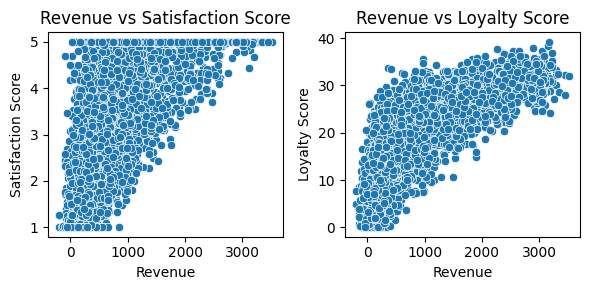

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter Plot: "Revenue" vs "Satisfaction Score"
sns.scatterplot(x='Revenue', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Revenue vs Satisfaction Score')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Satisfaction Score')

# Scatter Plot: "Revenue" vs "Loyalty Score"
sns.scatterplot(x='Revenue', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title('Revenue vs Loyalty Score')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Loyalty Score')

plt.tight_layout()
plt.show()

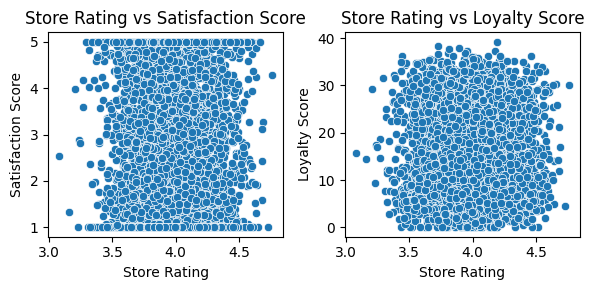

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter Plot: "Store Rating" vs "Satisfaction Score"
sns.scatterplot(x='Store Rating', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Store Rating vs Satisfaction Score')
axes[0].set_xlabel('Store Rating')
axes[0].set_ylabel('Satisfaction Score')

# Scatter Plot: "Store Rating" vs "Loyalty Score"
sns.scatterplot(x='Store Rating', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title('Store Rating vs Loyalty Score')
axes[1].set_xlabel('Store Rating')
axes[1].set_ylabel('Loyalty Score')

plt.tight_layout()
plt.show()

<ipython-input-40-e8d7dc6c7da5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Items Purchased', y='Loyalty Score', data=df, palette=palette)
<ipython-input-40-e8d7dc6c7da5>:5: UserWarning: The palette list has more values (4978) than needed (14), which may not be intended.
  sns.barplot(x='Items Purchased', y='Loyalty Score', data=df, palette=palette)


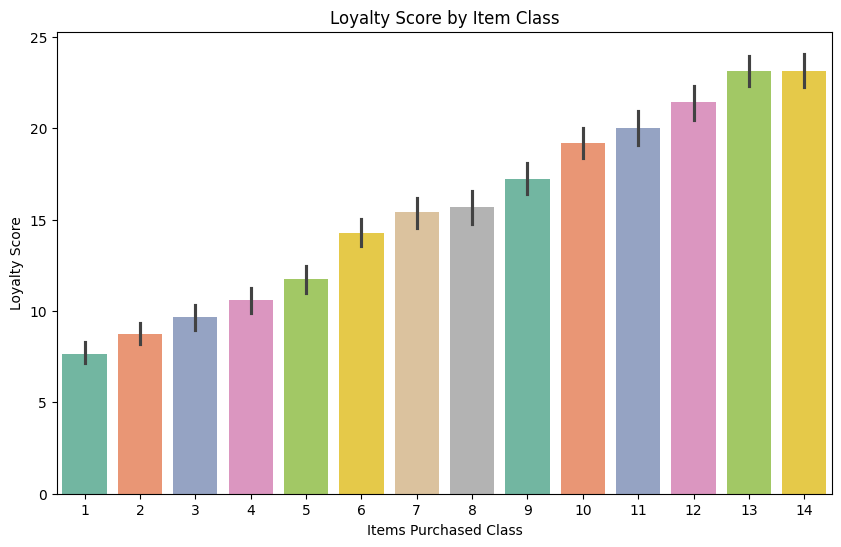

In [ ]:
palette = sns.color_palette("Set2", len(df))
plt.figure(figsize=(4,4))
sns.barplot(x='Items Purchased', y='Loyalty Score', data=df, palette=palette)

plt.title('Loyalty Score by Item Class')
plt.xlabel('Items Purchased Class')
plt.ylabel('Loyalty Score')
plt.show()

<ipython-input-43-d3c6d50477a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Loyalty Score', data=product_loyalty, palette=palette)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Laptop'),
  Text(2, 0, 'Mobile'),
  Text(3, 0, 'Tablet'),
  Text(4, 0, 'Television')])

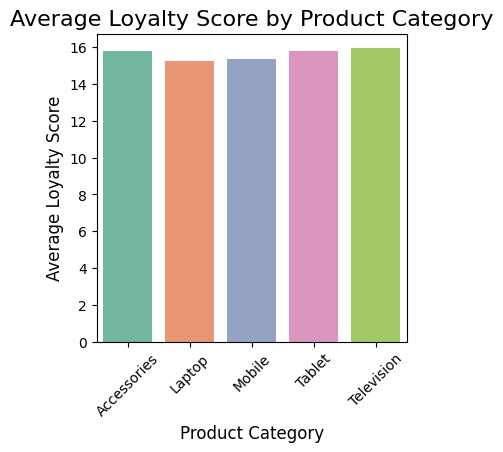

In [ ]:
product_loyalty = df.groupby('Product Category')['Loyalty Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(product_loyalty))

plt.figure(figsize=(4,4))
sns.barplot(x='Product Category', y='Loyalty Score', data=product_loyalty, palette=palette)

plt.title('Average Loyalty Score by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Loyalty Score', fontsize=12)
plt.xticks(rotation=45)

<ipython-input-47-09ae1b4d6c94>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Loyalty Score', data=Gender_loyalty, palette=palette)
<ipython-input-47-09ae1b4d6c94>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='Gender', y='Loyalty Score', data=Gender_loyalty, palette=palette)


([0, 1, 2], [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Other')])

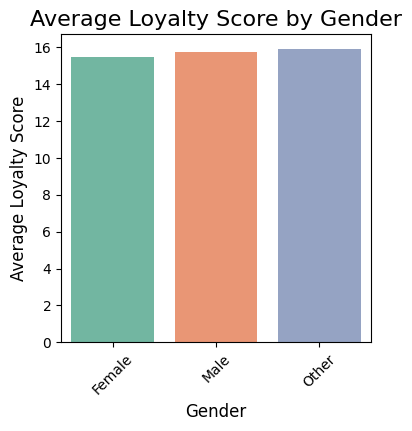

In [ ]:
Gender_loyalty = df.groupby('Gender')['Loyalty Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(product_loyalty))

plt.figure(figsize=(4,4))
sns.barplot(x='Gender', y='Loyalty Score', data=Gender_loyalty, palette=palette)
plt.title('Average Loyalty Score by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Loyalty Score', fontsize=12)
plt.xticks(rotation=45)

<ipython-input-51-397239ffd31c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Visit_time_loyalty = df.groupby('Preferred Visit Time')['Loyalty Score'].mean().reset_index()
<ipython-input-51-397239ffd31c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Preferred Visit Time', y='Loyalty Score', data=Visit_time_loyalty, palette=palette)
<ipython-input-51-397239ffd31c>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='Preferred Visit Time', y='Loyalty Score', data=Visit_time_loyalty, palette=palette)


([0, 1, 2],
 [Text(0, 0, 'Afternoon'), Text(1, 0, 'Evening'), Text(2, 0, 'Morning')])

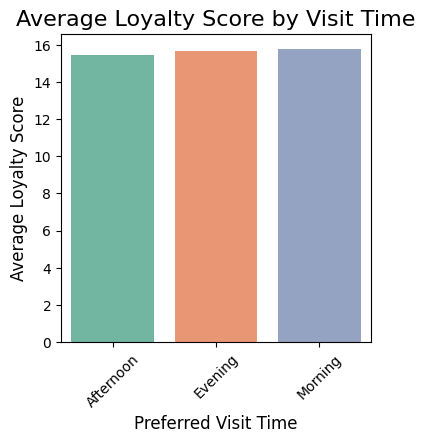

In [ ]:
Visit_time_loyalty = df.groupby('Preferred Visit Time')['Loyalty Score'].mean().reset_index()

palette = sns.color_palette("Set2", len(product_loyalty))
plt.figure(figsize=(4,4))
sns.barplot(x='Preferred Visit Time', y='Loyalty Score', data=Visit_time_loyalty, palette=palette)
plt.title('Average Loyalty Score by Visit Time', fontsize=16)
plt.xlabel('Preferred Visit Time', fontsize=12)
plt.ylabel('Average Loyalty Score', fontsize=12)
plt.xticks(rotation=45)

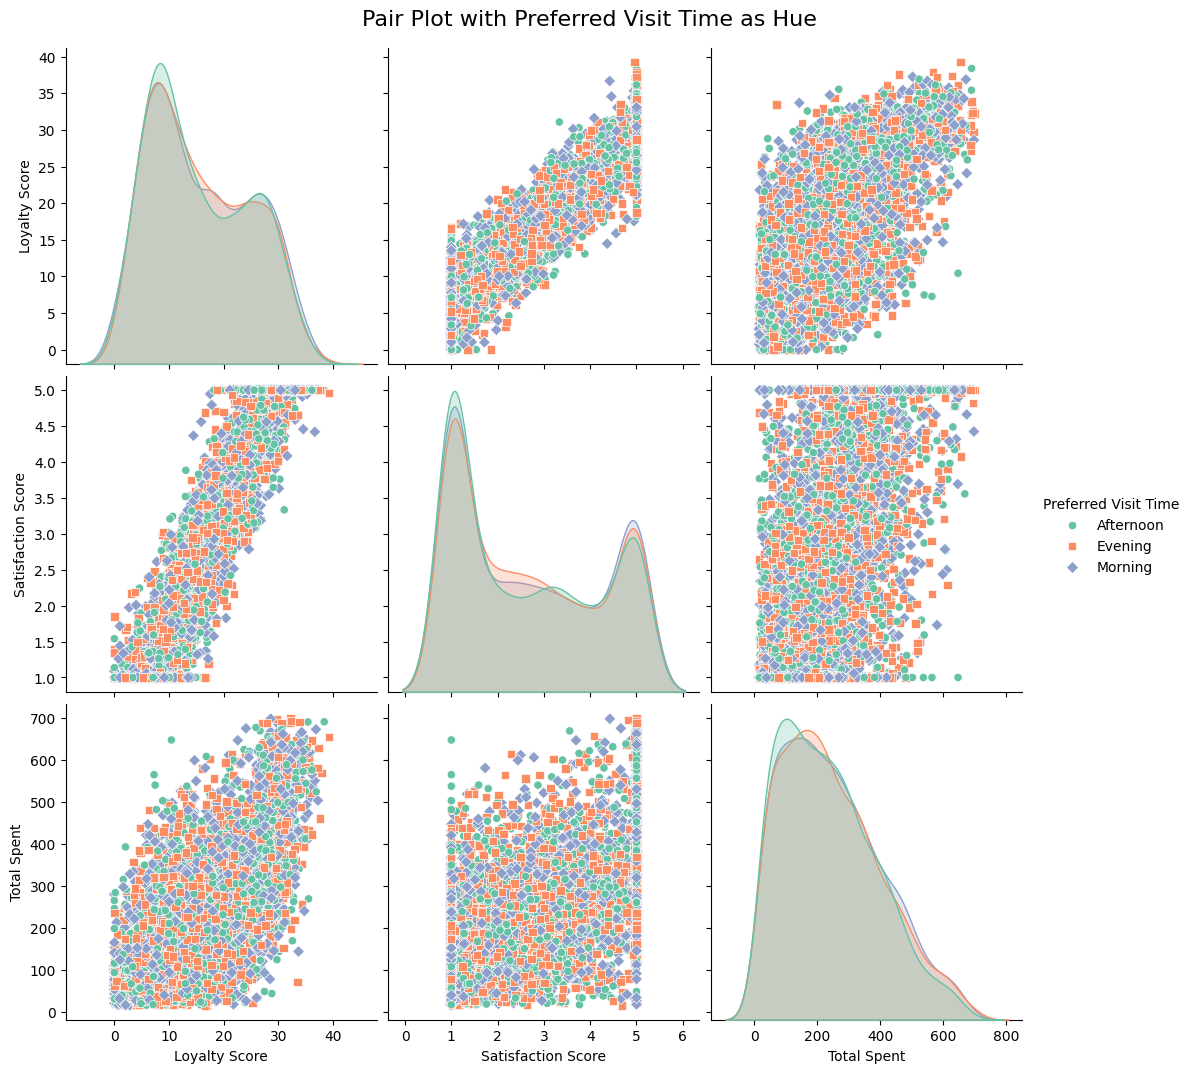

In [ ]:
columns_to_plot = ['Loyalty Score', 'Satisfaction Score', 'Total Spent']
categorical_hue = 'Preferred Visit Time'
df[categorical_hue] = df[categorical_hue].astype('category')

sns.pairplot(
    df,
    vars=columns_to_plot,
    hue=categorical_hue,
    palette='Set2',
    diag_kind='kde',
    markers=['o', 's', 'D'],
    height=3.5
)

plt.suptitle('Pair Plot with Preferred Visit Time as Hue', y=1.02, fontsize=16)
plt.show()

<ipython-input-52-632f07139d26>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Loyalty Score', data=Region_loyalty, palette=palette)
<ipython-input-52-632f07139d26>:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='Region', y='Loyalty Score', data=Region_loyalty, palette=palette)


([0, 1, 2, 3],
 [Text(0, 0, 'East'),
  Text(1, 0, 'North'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

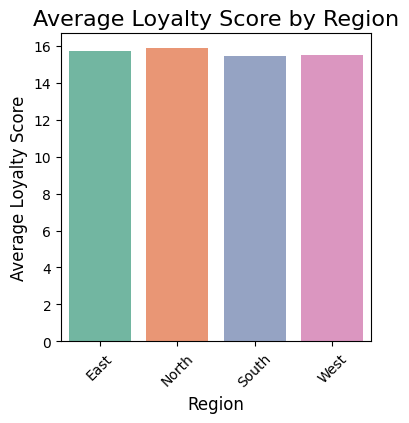

In [ ]:
Region_loyalty = df.groupby('Region')['Loyalty Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(product_loyalty))

plt.figure(figsize=(4,4))
sns.barplot(x='Region', y='Loyalty Score', data=Region_loyalty, palette=palette)

plt.title('Average Loyalty Score by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Loyalty Score', fontsize=12)
plt.xticks(rotation=45)

In [ ]:
segmentation = df.groupby(['Region', 'Product Category']).agg(
    total_spent=('Total Spent', 'sum'),
    avg_satisfaction_score=('Satisfaction Score', 'mean'),
    avg_loyalty_score=('Loyalty Score', 'mean'),
    avg_discount=('Discount (%)', 'mean'),
    total_items_purchased=('Items Purchased', 'sum')
).reset_index()

print(segmentation)

   Region Product Category   total_spent  avg_satisfaction_score  \
0    East      Accessories  62535.014413                2.743164   
1    East           Laptop  52521.154204                2.727230   
2    East           Mobile  56469.614626                2.616776   
3    East           Tablet  64334.999325                2.634932   
4    East       Television  53806.866791                2.600936   
5   North      Accessories  58323.933642                2.684178   
6   North           Laptop  62438.856788                2.663924   
7   North           Mobile  56218.772746                2.677596   
8   North           Tablet  54610.804170                2.753543   
9   North       Television  65029.579738                2.661867   
10  South      Accessories  62674.690221                2.628371   
11  South           Laptop  59992.615648                2.462558   
12  South           Mobile  73117.799572                2.604630   
13  South           Tablet  56388.587490        

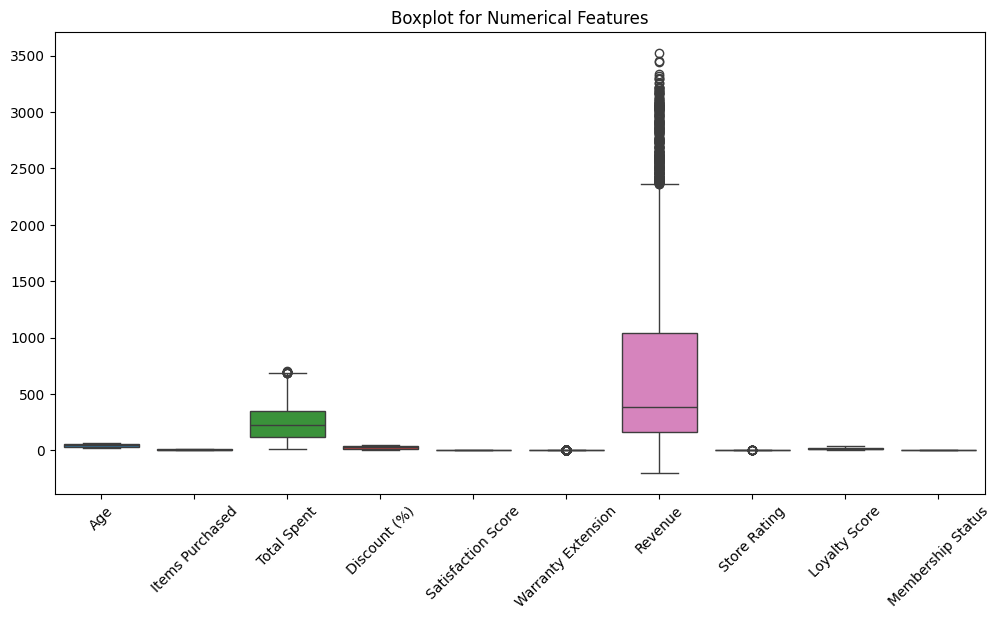

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=num_df)
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

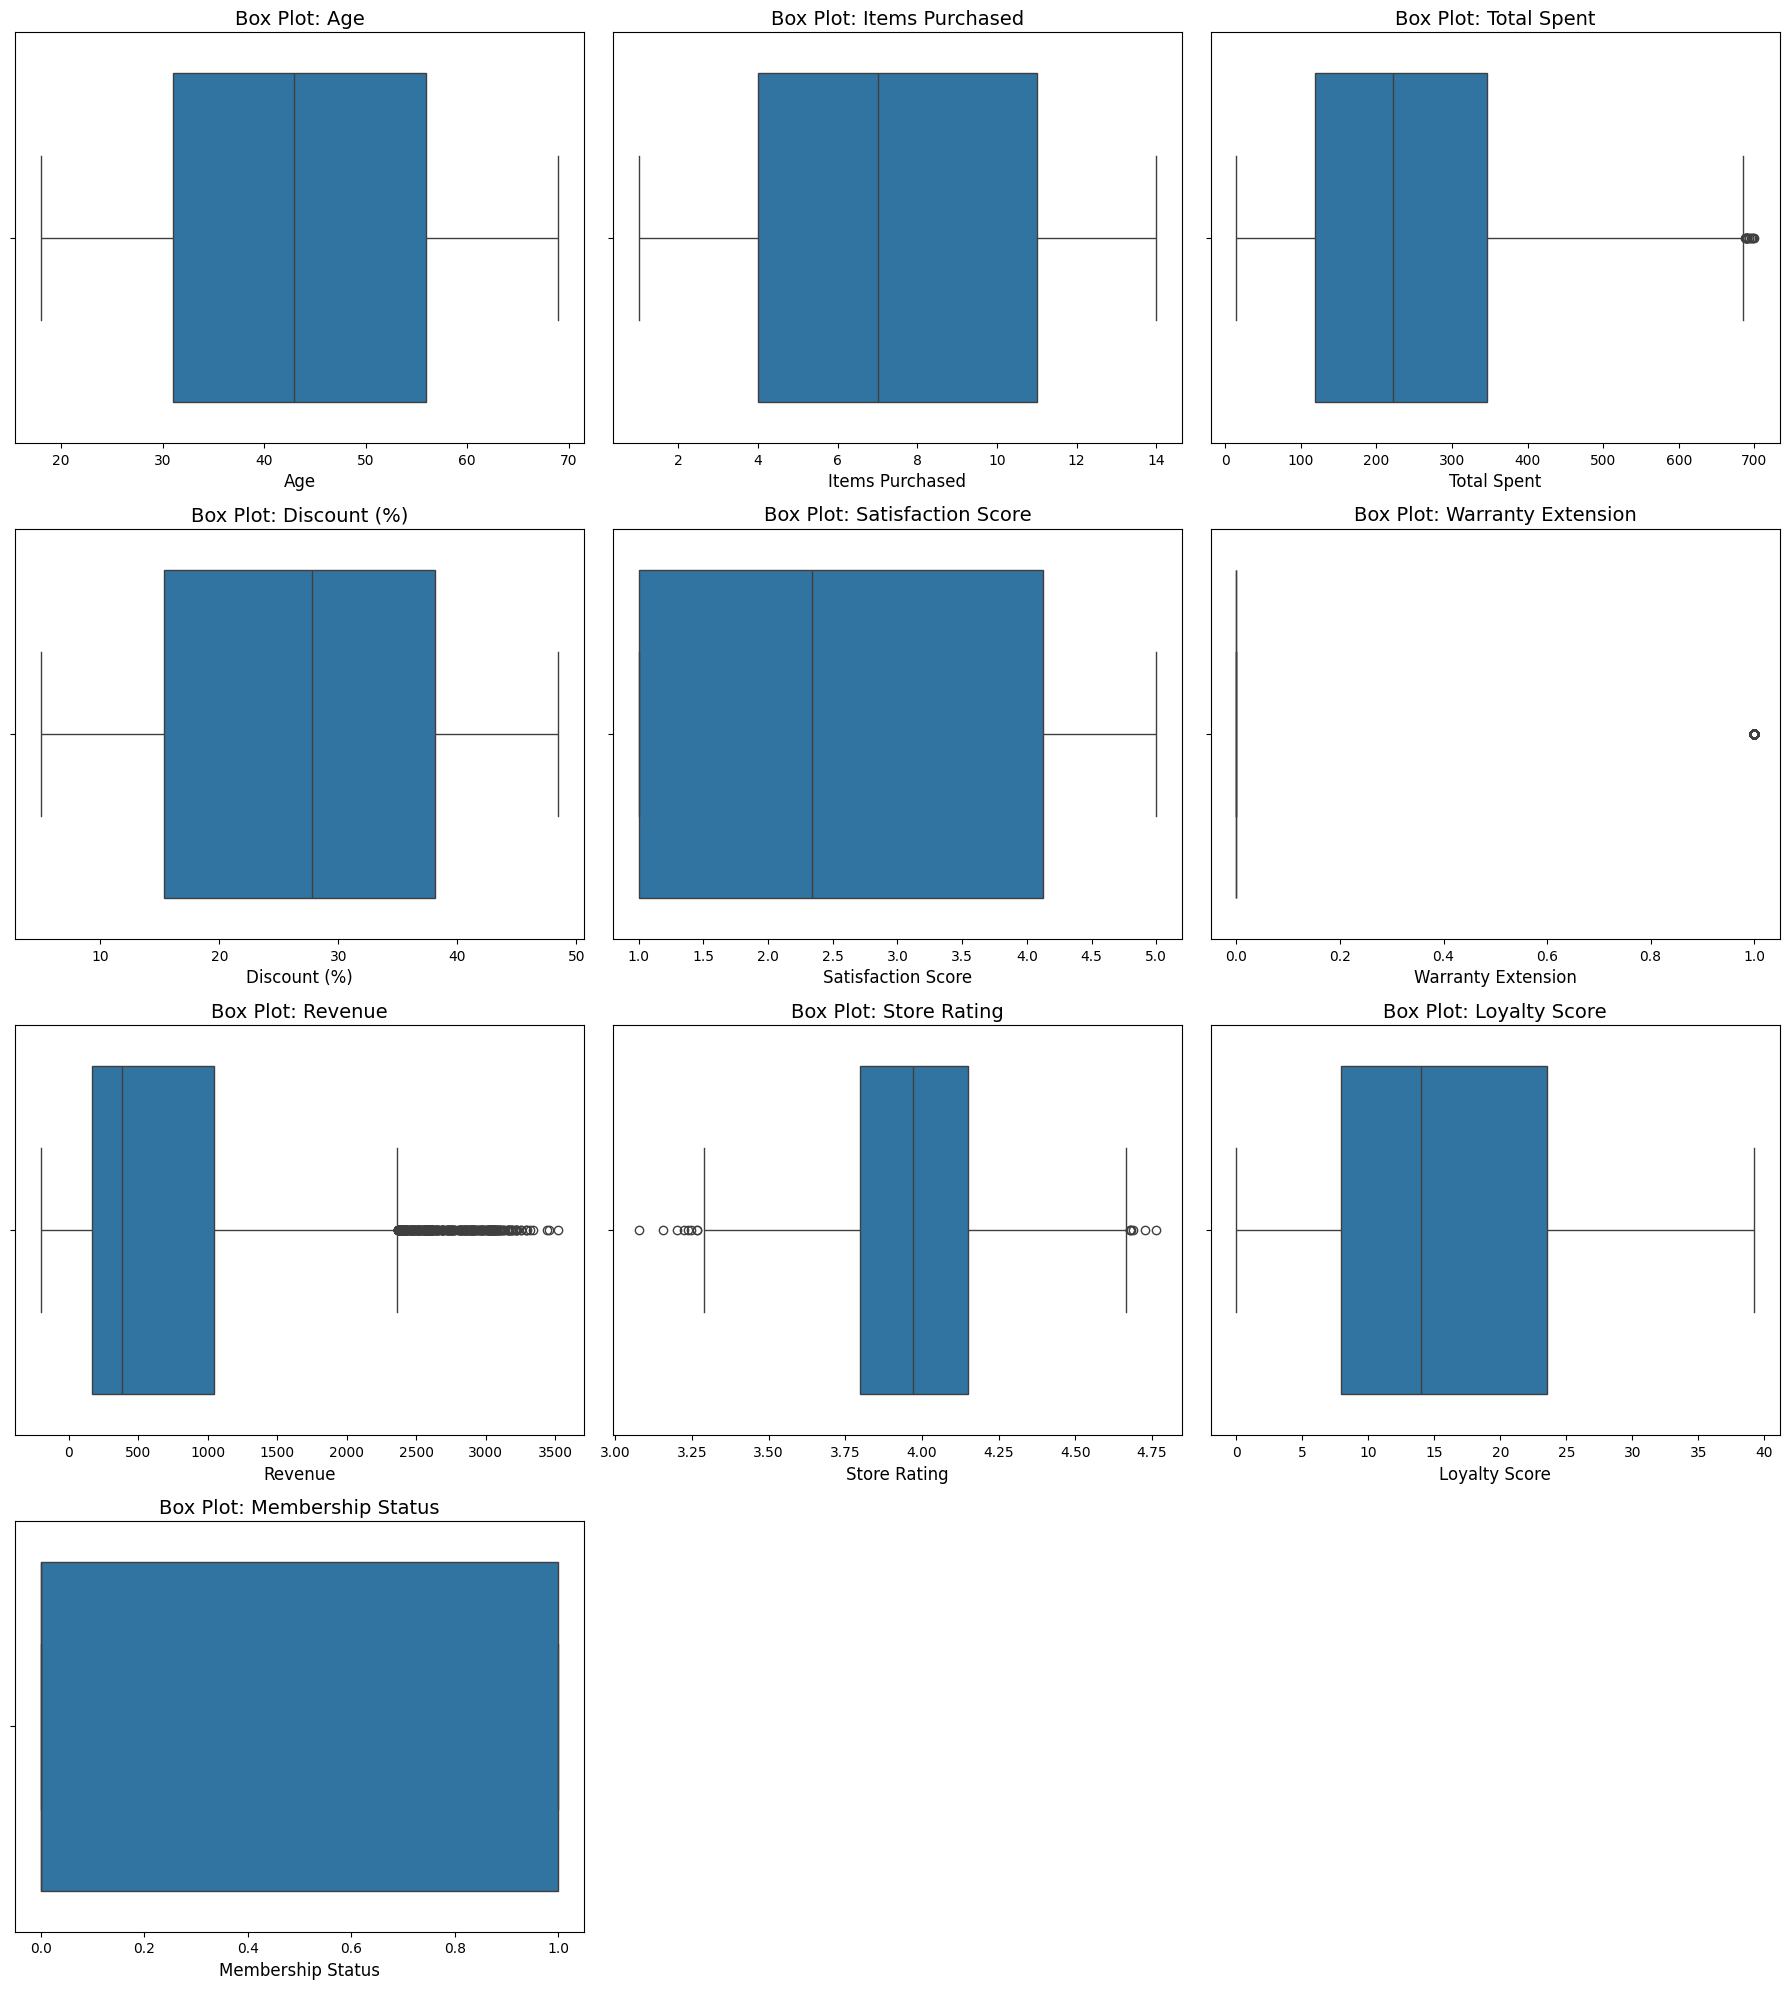

In [ ]:
numerical_columns = num_df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=num_df[col])
    plt.title(f'Box Plot: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))

for column in num_df.columns:
    outliers = num_df[column][outliers_iqr[column]]
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        print(outliers)
        print("\n")


Outliers in 'Total Spent':
205     693.419051
385     690.202677
432     695.414941
556     690.572975
786     696.487744
796     699.611576
949     689.148310
2131    688.278383
2319    688.249877
2502    697.846059
2930    690.430691
3155    693.135870
4500    687.275300
Name: Total Spent, dtype: float64


Outliers in 'Warranty Extension':
0       1
1       1
2       1
7       1
15      1
       ..
4967    1
4971    1
4988    1
4994    1
4998    1
Name: Warranty Extension, Length: 1093, dtype: int64


Outliers in 'Revenue':
4       2463.590392
6       2402.374713
25      2551.922888
46      2593.131497
60      3061.789585
           ...     
4903    3010.908777
4939    2581.666306
4952    2881.418903
4964    2520.103926
4979    2615.523036
Name: Revenue, Length: 305, dtype: float64


Outliers in 'Store Rating':
9       4.728713
904     3.266378
1429    4.680038
1488    3.224888
3021    3.155624
3151    3.076092
3650    3.202019
3727    4.764298
3945    3.266717
4186    4.689149
4273 

All the outliers present here seem to be genuine. There fore not going to remove them.

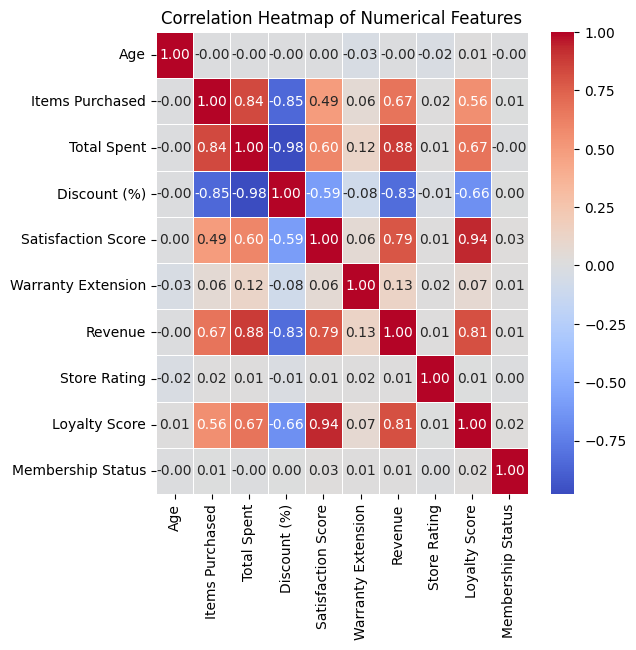

In [ ]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()